# ライブラリのインポート

In [2]:
import os
import pandas as pd
import sklearn
import csv
import datetime
# 可視化用
import japanize_matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# データの読み込み

In [3]:
!head ../data/weather_201301_201908_cleaned.csv

In [4]:
df = pd.read_csv("../data/weather_201301_201908_cleaned.csv")

In [5]:
df.head()

,date,high_temp,low_temp,weather_am,weather_pm
0,2013/1/1,9.6,3.0,晴,快晴
1,2013/1/2,14.4,4.2,快晴,快晴
2,2013/1/3,9.9,1.8,曇時々晴,晴
3,2013/1/4,6.9,1.0,快晴,晴
4,2013/1/5,4.8,0.2,曇,薄曇後晴


# EDA

## DataCleaning

In [6]:
df.head()

,date,high_temp,low_temp,weather_am,weather_pm
0,2013/1/1,9.6,3.0,晴,快晴
1,2013/1/2,14.4,4.2,快晴,快晴
2,2013/1/3,9.9,1.8,曇時々晴,晴
3,2013/1/4,6.9,1.0,快晴,晴
4,2013/1/5,4.8,0.2,曇,薄曇後晴


In [7]:
%matplotlib inline

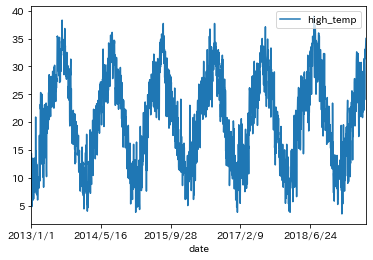

In [8]:
# 最高気温
df.plot(x="date", y="high_temp")

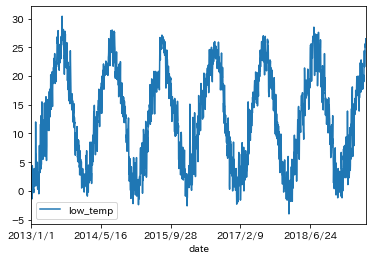

In [9]:
# 最低気温
df.plot(x="date", y="low_temp")

In [10]:
set(df["weather_am"])

{'みぞれ一時曇後晴',
 'みぞれ一時雪、あられを伴う',
 'みぞれ時々雨',
 'みぞれ時々雪一時曇',
 'みぞれ時々雪後雨',
 '大雨',
 '大雨、雷を伴う',
 '大雨一時曇',
 '大雨後一時曇',
 '大雨後時々晴、みぞれを伴う',
 '大雨後時々曇',
 '大雨後晴',
 '大雨後晴時々曇',
 '大雨後曇',
 '大雨後薄曇、雷を伴う',
 '大雨後薄曇一時晴',
 '大雨時々曇',
 '大雨時々曇、雷を伴う',
 '大雪',
 '大雪一時曇',
 '快晴',
 '晴',
 '晴一時曇',
 '晴一時曇、雷を伴う',
 '晴一時曇後一時雨、雷を伴う',
 '晴一時曇後雨',
 '晴一時薄曇',
 '晴一時雨',
 '晴一時雨、雷を伴う',
 '晴一時雪',
 '晴後一時みぞれ、あられを伴う',
 '晴後一時曇',
 '晴後一時薄曇',
 '晴後一時雨',
 '晴後一時雨、雷を伴う',
 '晴後一時雨、雷・ひょうを伴う',
 '晴後時々曇',
 '晴後時々曇一時雨',
 '晴後時々薄曇',
 '晴後曇',
 '晴後曇一時雨',
 '晴後曇一時雨、雷を伴う',
 '晴後薄曇',
 '晴後雨一時曇',
 '晴後雨時々曇',
 '晴時々曇',
 '晴時々曇、みぞれを伴う',
 '晴時々曇、雷を伴う',
 '晴時々曇一時雨',
 '晴時々曇一時雨、雷を伴う',
 '晴時々曇一時雪',
 '晴時々曇後一時雨',
 '晴時々薄曇',
 '晴時々雨、雷を伴う',
 '曇',
 '曇、雷を伴う',
 '曇一時晴',
 '曇一時晴後一時雨',
 '曇一時晴後時々雨',
 '曇一時雨',
 '曇一時雨、雷を伴う',
 '曇一時雨後一時晴',
 '曇一時雨後時々晴',
 '曇一時雨後晴',
 '曇一時雨後晴、あられを伴う',
 '曇一時雨後晴、雷を伴う',
 '曇一時雪',
 '曇一時雪、あられを伴う',
 '曇一時雪後一時晴',
 '曇後一時大雨、雷を伴う',
 '曇後一時晴',
 '曇後一時雨',
 '曇後一時雨、雷を伴う',
 '曇後一時雨後晴',
 '曇後大雨',
 '曇後大雨、雷を伴う',
 '曇後時々晴',
 '曇後時々雨',
 '曇後晴',
 '曇後晴一時雨',
 '曇後雨',
 '曇時々みぞれ一時雨',
 '曇時々晴',
 '曇時々晴一時雨',
 '

In [11]:
# 晴、曇り、雨、雪

In [12]:
df["weather_am_hare"] = df["weather_am"].apply(lambda x: 1 if "晴" in x else 0)
df["weather_pm_hare"] = df["weather_pm"].apply(lambda x: 1 if "晴" in x else 0)
df["weather_hare"] = (df["weather_am_hare"] + df["weather_pm_hare"]).apply(lambda x: 1 if x > 0 else 0)
df["weather_hare"].mean()

0.7558236272878536

In [13]:
df["weather_am_kumori"] = df["weather_am"].apply(lambda x: 1 if "曇" in x else 0)
df["weather_pm_kumori"] = df["weather_pm"].apply(lambda x: 1 if "曇" in x else 0)
df["weather_kumori"] = (df["weather_am_kumori"] + df["weather_pm_kumori"]).apply(lambda x: 1 if x > 0 else 0)
df["weather_kumori"].mean()

0.8552412645590682

In [14]:
df["weather_am_ame"] = df["weather_am"].apply(lambda x: 1 if "雨" in x else 0)
df["weather_pm_ame"] = df["weather_pm"].apply(lambda x: 1 if "雨" in x else 0)
df["weather_ame"] = (df["weather_am_ame"] + df["weather_pm_ame"]).apply(lambda x: 1 if x > 0 else 0)
df["weather_ame"].mean()

0.41555740432612315

In [15]:
df["weather_am_yuki"] = df["weather_am"].apply(lambda x: 1 if "雪" in x else 0)
df["weather_pm_yuki"] = df["weather_pm"].apply(lambda x: 1 if "雪" in x else 0)
df["weather_yuki"] = (df["weather_am_yuki"] + df["weather_pm_yuki"]).apply(lambda x: 1 if x > 0 else 0)
df["weather_yuki"].mean()

0.015391014975041598

In [16]:
df.dtypes

date                  object
high_temp            float64
low_temp             float64
weather_am            object
weather_pm            object
weather_am_hare        int64
weather_pm_hare        int64
weather_hare           int64
weather_am_kumori      int64
weather_pm_kumori      int64
weather_kumori         int64
weather_am_ame         int64
weather_pm_ame         int64
weather_ame            int64
weather_am_yuki        int64
weather_pm_yuki        int64
weather_yuki           int64
dtype: object

In [17]:
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month

In [18]:
df["month"]

0       1
1       1
2       1
3       1
4       1
       ..
2399    7
2400    7
2401    7
2402    7
2403    8
Name: month, Length: 2404, dtype: int64

In [19]:
df["date"]

0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-05
          ...    
2399   2019-07-28
2400   2019-07-29
2401   2019-07-30
2402   2019-07-31
2403   2019-08-01
Name: date, Length: 2404, dtype: datetime64[ns]

## 月別集計

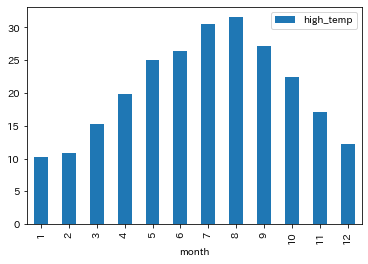

In [20]:
df.groupby("month").mean().plot.bar(y="high_temp")

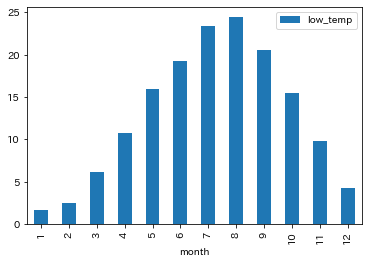

In [21]:
df.groupby("month").mean().plot.bar(y="low_temp")

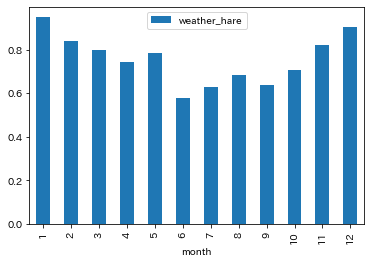

In [22]:
df.groupby("month").mean().plot.bar(y="weather_hare")

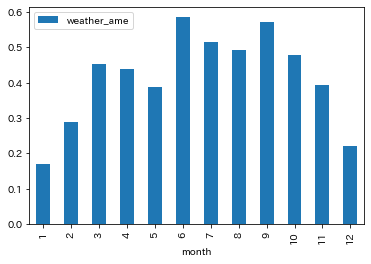

In [23]:
df.groupby("month").mean().plot.bar(y="weather_ame")

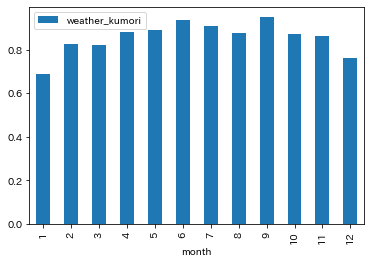

In [24]:
df.groupby("month").mean().plot.bar(y="weather_kumori")

In [25]:
# 雨か、雨じゃないかで最高気温を比較する

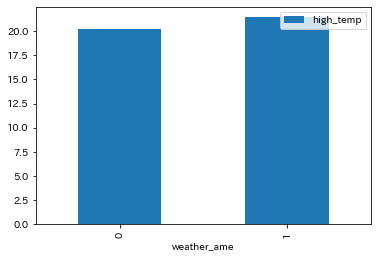

In [26]:
df.groupby("weather_ame").mean().plot.bar(y="high_temp")

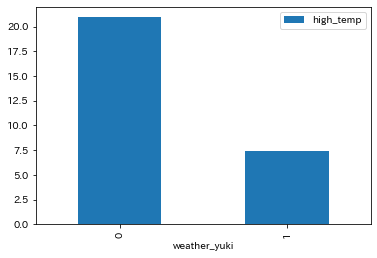

In [27]:
df.groupby("weather_yuki").mean().plot.bar(y="high_temp")

# 分析設計
## モデルの概要
当日までのデータを用いて、明日の天気を予測する

## 説明変数
* 時系列特徴
    * 日付
    * 週番号
    * 月番号
* 当日の天気
* 当日の最高気温
* 当日の最低気温

## 目的変数
* 明日の天気
    * 晴れの確率
    * 雨の確率
    * 曇りの確率
    * 雪の確率
* 明日の最高気温
* 明日の最低気温

## 母集団
train: 2013年1月~2017年12月までの天気データ

validation: 2018年1月~2018年12月までの天気データ

test : 2019年1月~2019年7月

In [28]:
# 説明変数の作成

In [29]:
# 時系列特徴
df["dayofyear"] = df["date"].dt.dayofyear
df["dayofyear"]

0         1
1         2
2         3
3         4
4         5
       ... 
2399    209
2400    210
2401    211
2402    212
2403    213
Name: dayofyear, Length: 2404, dtype: int64

In [30]:
df["week"] = df["date"].dt.week
df["month"] = df["date"].dt.month

In [31]:
# 天気
df.loc[:, ["weather_hare", "weather_ame", "weather_kumori", "weather_yuki"]]

,weather_hare,weather_ame,weather_kumori,weather_yuki
0,1,0,0,0
1,1,0,0,0
2,1,0,1,0
3,1,0,0,0
4,1,0,1,0
...,...,...,...,...
2399,1,1,1,0
2400,1,0,1,0
2401,1,0,1,0
2402,1,0,1,0


In [32]:
# 気温
df.loc[:, ["high_temp", "low_temp"]]

,high_temp,low_temp
0,9.6,3.0
1,14.4,4.2
2,9.9,1.8
3,6.9,1.0
4,4.8,0.2
...,...,...
2399,32.3,25.0
2400,33.7,25.3
2401,33.6,26.0
2402,34.6,26.5


In [33]:
# 目的変数を作成する
df_tomorrow = df.copy()
df_tomorrow["date"] = df["date"] - datetime.timedelta(1)
df_tomorrow

,date,high_temp,low_temp,weather_am,weather_pm,weather_am_hare,weather_pm_hare,weather_hare,weather_am_kumori,weather_pm_kumori,weather_kumori,weather_am_ame,weather_pm_ame,weather_ame,weather_am_yuki,weather_pm_yuki,weather_yuki,month,dayofyear,week
0,2012-12-31,9.6,3.0,晴,快晴,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1
1,2013-01-01,14.4,4.2,快晴,快晴,1,1,1,0,0,0,0,0,0,0,0,0,1,2,1
2,2013-01-02,9.9,1.8,曇時々晴,晴,1,1,1,1,0,1,0,0,0,0,0,0,1,3,1
3,2013-01-03,6.9,1.0,快晴,晴,1,1,1,0,0,0,0,0,0,0,0,0,1,4,1
4,2013-01-04,4.8,0.2,曇,薄曇後晴,0,1,1,1,1,1,0,0,0,0,0,0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399,2019-07-27,32.3,25.0,晴時々曇一時雨,晴時々薄曇,1,1,1,1,1,1,1,0,1,0,0,0,7,209,30
2400,2019-07-28,33.7,25.3,晴一時曇,曇時々晴,1,1,1,1,1,1,0,0,0,0,0,0,7,210,31
2401,2019-07-29,33.6,26.0,晴後一時薄曇,晴一時薄曇,1,1,1,1,1,1,0,0,0,0,0,0,7,211,31
2402,2019-07-30,34.6,26.5,晴後薄曇,晴時々薄曇,1,1,1,1,1,1,0,0,0,0,0,0,7,212,31


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
def set_target(target_col):
    df_tomorrow["target"] = df_tomorrow[target_col]
    return pd.merge(df, df_tomorrow.loc[:, ["date", "target"]], how="left", on="date")
df_dm = set_target("low_temp")

In [36]:
df_tomorrow.loc[:, ["date", "target"]]

,date,target
0,2012-12-31,3.0
1,2013-01-01,4.2
2,2013-01-02,1.8
3,2013-01-03,1.0
4,2013-01-04,0.2
...,...,...
2399,2019-07-27,25.0
2400,2019-07-28,25.3
2401,2019-07-29,26.0
2402,2019-07-30,26.5


In [37]:
df_dm.tail()

,date,high_temp,low_temp,weather_am,weather_pm,weather_am_hare,weather_pm_hare,weather_hare,weather_am_kumori,weather_pm_kumori,...,weather_am_ame,weather_pm_ame,weather_ame,weather_am_yuki,weather_pm_yuki,weather_yuki,month,dayofyear,week,target
2399,2019-07-28,32.3,25.0,晴時々曇一時雨,晴時々薄曇,1,1,1,1,1,...,1,0,1,0,0,0,7,209,30,25.3
2400,2019-07-29,33.7,25.3,晴一時曇,曇時々晴,1,1,1,1,1,...,0,0,0,0,0,0,7,210,31,26.0
2401,2019-07-30,33.6,26.0,晴後一時薄曇,晴一時薄曇,1,1,1,1,1,...,0,0,0,0,0,0,7,211,31,26.5
2402,2019-07-31,34.6,26.5,晴後薄曇,晴時々薄曇,1,1,1,1,1,...,0,0,0,0,0,0,7,212,31,26.3
2403,2019-08-01,35.0,26.3,晴,晴,1,1,1,0,0,...,0,0,0,0,0,0,8,213,31,NaN


In [38]:
X = df_dm[~df_dm["target"].isna()].loc[:,                           
        ["date",
        "high_temp",
         "low_temp",
         "weather_hare",
         "weather_kumori",
         "weather_ame",
         "weather_yuki",
         "month",
         "dayofyear",
         "week",
         "month"
        ]]

y = df_dm[~df_dm["target"].isna()]["target"]

## 当日の最低気温のみで予測した場合

In [39]:
X.head()

,date,high_temp,low_temp,weather_hare,weather_kumori,weather_ame,weather_yuki,month,dayofyear,week,month
0,2013-01-01,9.6,3.0,1,0,0,0,1,1,1,1
1,2013-01-02,14.4,4.2,1,0,0,0,1,2,1,1
2,2013-01-03,9.9,1.8,1,1,0,0,1,3,1,1
3,2013-01-04,6.9,1.0,1,0,0,0,1,4,1,1
4,2013-01-05,4.8,0.2,1,1,0,0,1,5,1,1


In [40]:
y

0        4.2
1        1.8
2        1.0
3        0.2
4       -1.4
        ... 
2398    25.0
2399    25.3
2400    26.0
2401    26.5
2402    26.3
Name: target, Length: 2403, dtype: float64

In [41]:
train_idx = (X["date"] < "2018-01-01")
val_idx    = (X["date"] >= "2018-01-01")  & (X["date"] < "2019-01-01")
test_idx  = (X["date"] >= "2019-01-01")
train_idx

0        True
1        True
2        True
3        True
4        True
        ...  
2398    False
2399    False
2400    False
2401    False
2402    False
Name: date, Length: 2403, dtype: bool

In [42]:
X_train = X[train_idx].drop(columns="date")
y_train = y[train_idx]
X_val = X[val_idx].drop(columns="date")
y_val = y[val_idx]

In [43]:
X.shape

(2403, 11)

In [44]:
X_train.shape

(1826, 10)

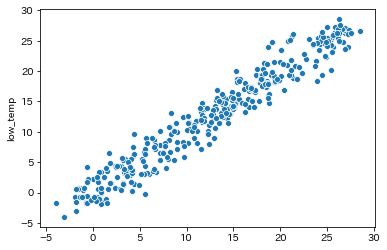

In [45]:
sns.scatterplot(y_val.values, X_val["low_temp"])

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val.values, X_val["low_temp"])

3.9272054794520543

## 最低気温の予測

In [47]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
reg = LinearRegression().fit(X_train, y_train)
print("train_score", reg.score(X_train, y_train))
print("val_score", reg.score(X_val, y_val))

train_score 0.9507824492665277
val_score 0.9507104868340592


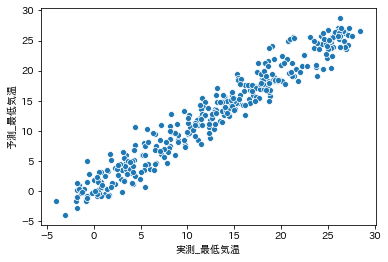

In [48]:
plt.xlabel("実測_最低気温")
plt.ylabel("予測_最低気温")
sns.scatterplot(y_val.values, reg.predict(X_val))

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val.values, reg.predict(X_val))

3.5792606232144064

## 雨の予測

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
df_dm = set_target("weather_ame")

In [52]:
df_dm.head()

,date,high_temp,low_temp,weather_am,weather_pm,weather_am_hare,weather_pm_hare,weather_hare,weather_am_kumori,weather_pm_kumori,...,weather_am_ame,weather_pm_ame,weather_ame,weather_am_yuki,weather_pm_yuki,weather_yuki,month,dayofyear,week,target
0,2013-01-01,9.6,3.0,晴,快晴,1,1,1,0,0,...,0,0,0,0,0,0,1,1,1,0.0
1,2013-01-02,14.4,4.2,快晴,快晴,1,1,1,0,0,...,0,0,0,0,0,0,1,2,1,0.0
2,2013-01-03,9.9,1.8,曇時々晴,晴,1,1,1,1,0,...,0,0,0,0,0,0,1,3,1,0.0
3,2013-01-04,6.9,1.0,快晴,晴,1,1,1,0,0,...,0,0,0,0,0,0,1,4,1,0.0
4,2013-01-05,4.8,0.2,曇,薄曇後晴,0,1,1,1,1,...,0,0,0,0,0,0,1,5,1,0.0


In [53]:
X = df_dm[~df_dm["target"].isna()].loc[:, 
                                 
        ["date",
        "high_temp",
         "low_temp",
         "weather_hare",
         "weather_kumori",
         "weather_ame",
         "weather_yuki",
         "month",
         "dayofyear",
         "week",
         "month"
        ]]

y = df_dm[~df_dm["target"].isna()]["target"]
train_idx = (X["date"] < "2018-01-01")
val_idx    = (X["date"] >= "2018-01-01")  & (X["date"] < "2019-01-01")
test_idx  = (X["date"] >= "2019-01-01")
X_train = X[train_idx].drop(columns="date")
y_train = y[train_idx]
X_val = X[val_idx].drop(columns="date")
y_val = y[val_idx]

In [54]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
reg = LogisticRegression().fit(X_train, y_train)

/Users/nobu/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
reg.predict(X_val)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 0.

In [56]:
# 当日の天気をそのままとして
# 正解率
from sklearn.metrics import accuracy_score
accuracy_score(y_val, X_val["weather_ame"])

0.6273972602739726

In [57]:
print("train accuracy: ", accuracy_score(y_train, reg.predict(X_train)))
print("val accuracy: ", accuracy_score(y_val, reg.predict(X_val)))

train accuracy:  0.6796276013143483
val accuracy:  0.6438356164383562
